In [1]:
# 1. Import Libraries and Load Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

df = pd.read_csv('../data/raw/Data for task 1.csv')

# Encode diagnosis (B=0, M=1)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1}).astype(int)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 2. Basic Data Checks

print('Data Shape:', df.shape)
print('\nFirst 5 rows of the dataset:')
display(df.head())
print('\nData Types:')
print(df.dtypes)
print('\nMissing Values:')
print(df.isnull().sum())

# Drop column 'Unnamed: 32'
df = df.drop('Unnamed: 32', axis=1)

Data Shape: (569, 33)

First 5 rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Data Types:
id                           int64
diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavi

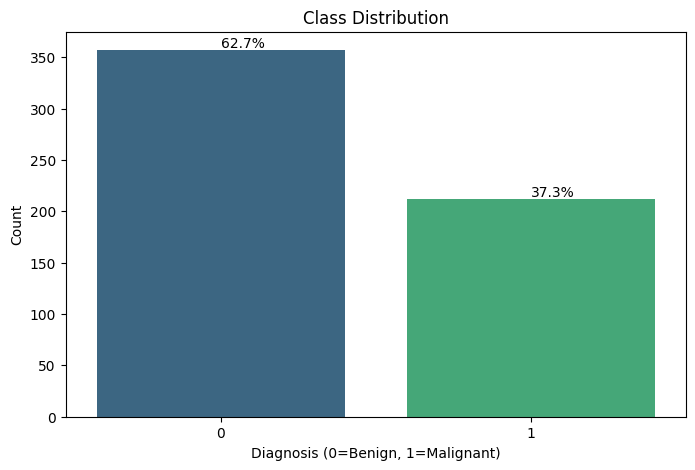

In [3]:
# 3. Cell Distribution

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette='viridis', legend=False)
plt.title('Class Distribution')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Count')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), va='bottom')
    

plt.savefig('../reports/figures/EDA_class_distribution.png')
plt.show()

In [4]:
# 4. Feature Categories

mean_features = [col for col in df.columns if '_mean' in col]
se_features = [col for col in df.columns if '_se' in col]
worst_features = [col for col in df.columns if '_worst' in col]

print(f"Mean features: {len(mean_features)} (e.g., {mean_features[0:3]})")
print(f"Standard error features: {len(se_features)} (e.g., {se_features[0:3]})")
print(f"Worst features: {len(worst_features)} (e.g., {worst_features[0:3]})")

Mean features: 10 (e.g., ['radius_mean', 'texture_mean', 'perimeter_mean'])
Standard error features: 10 (e.g., ['radius_se', 'texture_se', 'perimeter_se'])
Worst features: 10 (e.g., ['radius_worst', 'texture_worst', 'perimeter_worst'])


In [5]:
# 5. Statistical Summary (Benign vs Malignant)

key_features = ['radius_worst', 'texture_worst', 'concavity_worst', 'area_worst']
display(df[key_features + ['diagnosis']].groupby('diagnosis').agg(['mean', 'std']))

radius_worst           texture_worst           concavity_worst  \
                  mean       std          mean       std            mean   
diagnosis                                                                  
0            13.379801  1.981368     23.515070  5.493955        0.166238   
1            21.134811  4.283569     29.318208  5.434804        0.450606   

                      area_worst              
                std         mean         std  
diagnosis                                     
0          0.140368   558.899440  163.601424  
1          0.181507  1422.286321  597.967743

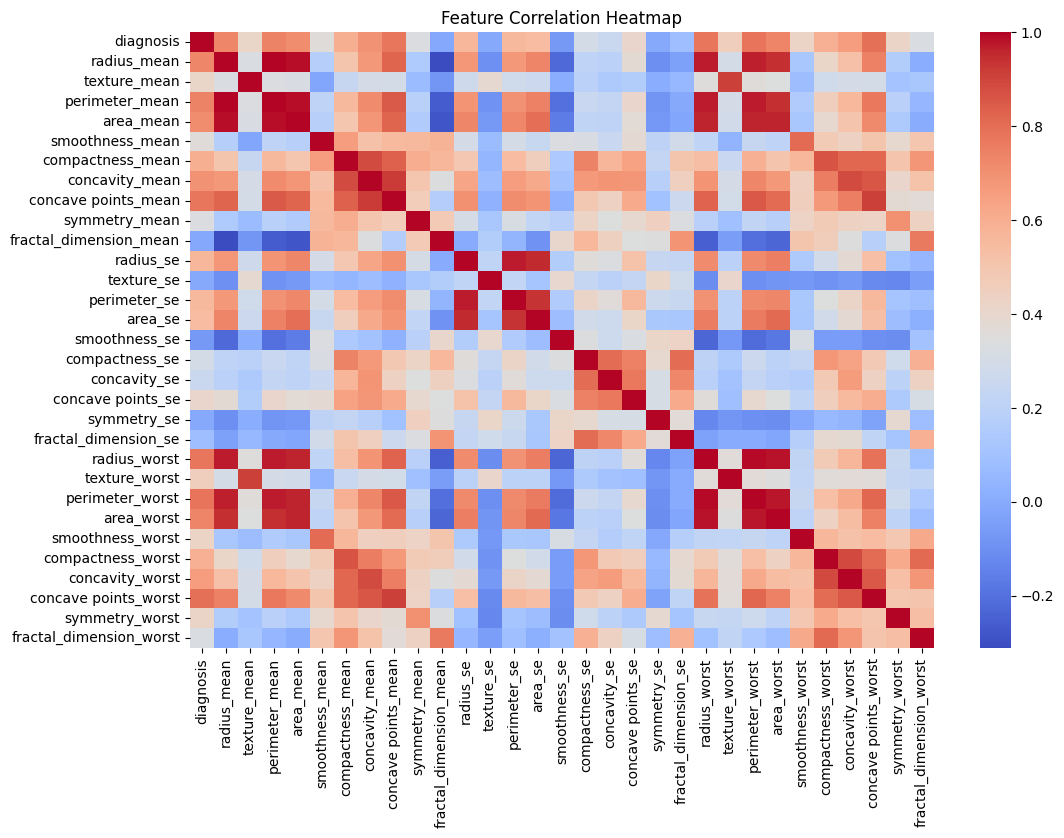

Top 5 Features Correlated with Diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
Name: diagnosis, dtype: float64


In [6]:
# 6. Correlation Analysis

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop('id', axis=1).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.savefig("../reports/figures/EDA_full_correlation_heatmap.png", bbox_inches='tight')
plt.show()

# Top 5 correlated features
corr_with_target = df.drop('id', axis=1).corr()['diagnosis'].sort_values(ascending=False)
print("Top 5 Features Correlated with Diagnosis:")
print(corr_with_target[1:6])  # Skip diagnosis itself

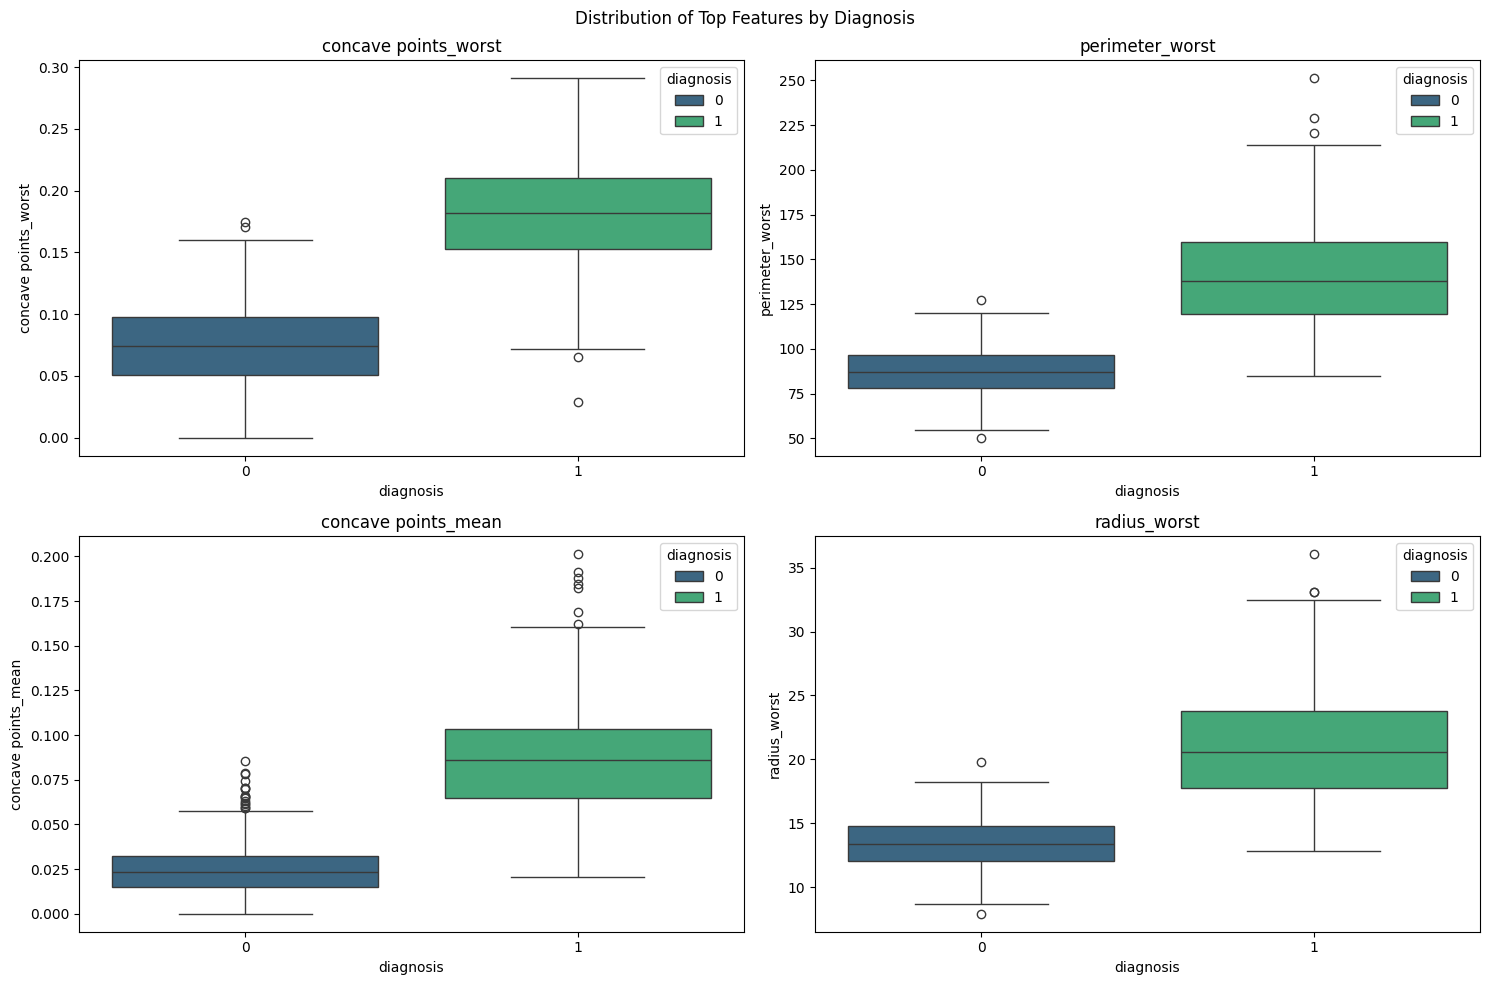

In [7]:
# 7. Feature Distribution

top_features = corr_with_target.index[1:5]  # Top 4 after skipping diagnosis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle("Distribution of Top Features by Diagnosis")

for i, feature in enumerate(top_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x='diagnosis', y=feature, data=df, ax=axes[row, col], hue='diagnosis', palette='viridis')
    axes[row, col].set_title(f"{feature}")

plt.tight_layout()
plt.savefig("../reports/figures/EDA_feature_distributions.png", bbox_inches='tight')
plt.show()

In [ ]:
# 8. Advanced Profiling

# Generate HTML report
profile = ProfileReport(df, title="Breast Cancer Dataset Profiling Report", explorative=True)
profile.to_file("../reports/breast_cancer_report.html")

Summarize dataset:  87%|████████▋ | 34/39 [00:00<00:00, 54.08it/s, Calculate auto correlation]               c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 0 0 0 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 0 9 9 9 9 9 9 9 9 0 9 0 0 0 0 0 9 9 0 9 9 0 0 0 0 9 0 9 9 0 0 0 0 9 0 9 9
 0 9 0 9 9 0 0 0 9 9 0 9 9 9 0 0 0 9 0 0 9 9 0 0 0 9 9 0 0 0 0 9 0 0 9 0 0
 0 0 0 0 0 0 9 9 9 0 9 9 0 0 0 9 9 0 9 0 9 9 0 9 9 0 0 9 0 0 9 0 0 0 0 9 0
 0 0 0 0 0 0 0 0 9 0 0 0 0 9 9 0 9 0 0 9 9 0 0 9 9 0 0 0 0 9 0 0 9 9 9 0 9
 0 9 0 0 0 9 0 0 9 9 0 9 9 9 9 0 9 9 9 0 9 0 9 0 0 9 0 9 9 9 9 0 0 9 9 0 0
 0 9 0 0 0 0 0 9 9 0 0 9 0 0 9 9 0 9 0 0 0 0 9 0 0 0 0 0 9 0 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 0 0 0 0 0 0 9 0 9 0 0 9 0 0 9 0 9 9 0 0 0 0 0 0 0 0 0 0 0 0
 0 9 0 0 9 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0